In [31]:
import os

# Get the directory of the current script
current_directory = os.getcwd()
current_directory

'/Users/sungyeonkim/Desktop/DSAN 5100'

In [2]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open("../../Downloads/cleaned_10_28_2023.csv","r") as f:
    df = pd.read_csv(f, converters={'routes': ast.literal_eval})

In [3]:
df.head()

,station_complex_id,borough,routes,payment_method,latitude,longitude,ridership,transfers,region,ridership_percap,transfers_percap
0,A002,Manhattan,"[5, N, R, 4, W, 6]",metrocard,40.762661,-73.967255,11868,995,NW,0.007435,0.000623
1,A002,Manhattan,"[5, N, R, 4, W, 6]",omny,40.762661,-73.967255,15570,2348,NW,0.009754,0.001471
2,A006,Manhattan,"[N, R, W]",metrocard,40.764812,-73.973351,5546,71,NW,0.003474,0.000044
3,A006,Manhattan,"[N, R, W]",omny,40.764812,-73.973351,7802,238,NW,0.004888,0.000149
4,A010,Manhattan,"[N, R, Q, W]",metrocard,40.764664,-73.980659,9293,153,NW,0.005822,0.000096


In [4]:
df1 = df[["payment_method", "borough", "ridership"]]
df1

,payment_method,borough,ridership
0,metrocard,Manhattan,11868
1,omny,Manhattan,15570
2,metrocard,Manhattan,5546
3,omny,Manhattan,7802
4,metrocard,Manhattan,9293
...,...,...,...
838,omny,Bronx,332
839,metrocard,Staten Island,1787
840,omny,Staten Island,1036
841,metrocard,Staten Island,225


In [5]:
pd.crosstab(df1['payment_method'], df1['borough'])

borough,Bronx,Brooklyn,Manhattan,Queens,Staten Island
payment_method,,,,,
metrocard,68,157,119,78,2
omny,68,154,117,78,2


In [6]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df1['payment_method'], df1['borough'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi2:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

Chi2: 0.016232639834538695
P-value: 0.9999672403541472
Degrees of freedom: 4
Expected frequencies table:
borough             Bronx    Brooklyn   Manhattan     Queens  Staten Island
payment_method                                                             
metrocard       68.403321  156.422301  118.699881  78.462633       2.011862
omny            67.596679  154.577699  117.300119  77.537367       1.988138


# Modified code 

In [10]:
# Interpret the results
alpha = 0.05  # significance level
print(f"\nSignificance level: {alpha}")
if p < alpha:
    print("Reject the null hypothesis. There is a significant association between payment_method and borough.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between payment_method and borough.")


Significance level: 0.05
Fail to reject the null hypothesis. There is no significant association between payment_method and borough.


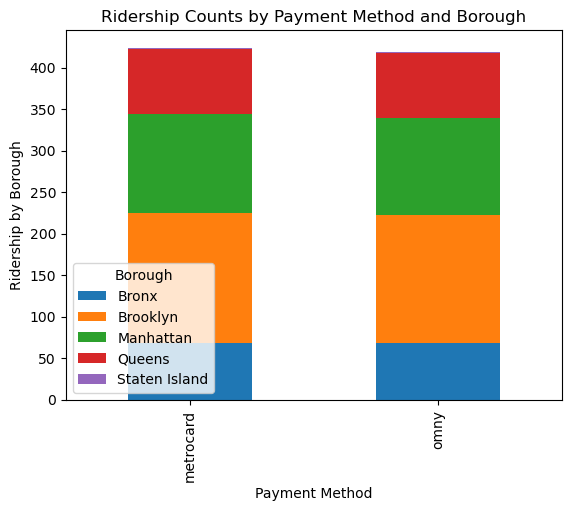

In [81]:
import matplotlib.pyplot as plt

contingency_table.plot(kind='bar', stacked=True)

plt.title('Ridership Counts by Payment Method and Borough')
plt.xlabel('Payment Method')
plt.ylabel('Ridership by Borough')
plt.legend(title='Borough')

plt.show()

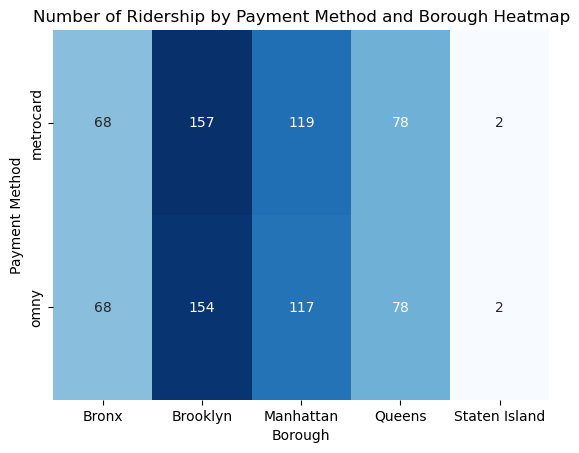

In [83]:
import seaborn as sns

sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=False)

plt.title('Number of Ridership by Payment Method and Borough Heatmap')
plt.xlabel('Borough')
plt.ylabel('Payment Method')

plt.show()

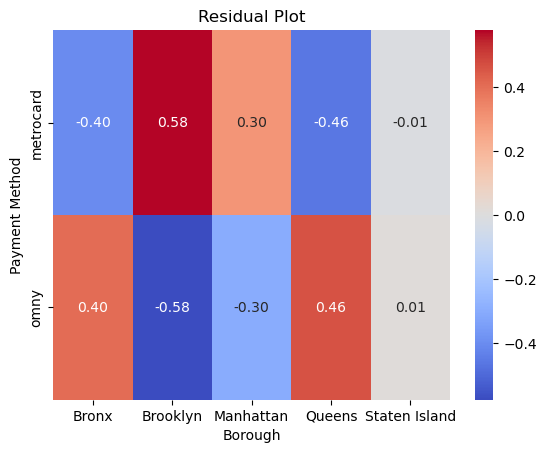

In [85]:
residuals = contingency_table - chi2_contingency(contingency_table)[3]

sns.heatmap(residuals, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title('Residual Plot')
plt.xlabel('Borough')
plt.ylabel('Payment Method')

plt.show()

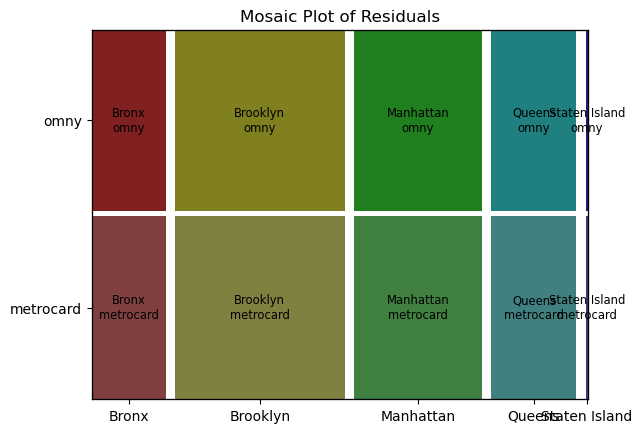

In [88]:
from statsmodels.graphics.mosaicplot import mosaic

residuals = chi2_contingency(contingency_table)[3]

residuals_df = pd.DataFrame(residuals, index=contingency_table.index, columns=contingency_table.columns)

mosaic(residuals_df.unstack(), gap=0.02, title='Mosaic Plot of Residuals')

plt.show()